In [4]:
import cv2 
photo1= cv2.imread("test.jpeg") 

In [5]:
def lbp(photo):
  import cv2 
  import numpy as np 
  def assign_bit(picture, x, y, c):   #comparing bit with threshold value of centre pixel
      bit = 0  
      try:          
          if picture[x][y] >= c: 
              bit = 1         
      except: 
          pass
      return bit 
  def local_bin_val(picture, x, y):  #calculating local binary pattern value of a pixel
      eight_bit_binary = []
      centre = picture[x][y] 
      powers = [1, 2, 4, 8, 16, 32, 64, 128] 
      decimal_val = 0
      #starting from top right,assigning bit to pixels clockwise 
      eight_bit_binary.append(assign_bit(picture, x-1, y + 1,centre)) 
      eight_bit_binary.append(assign_bit(picture, x, y + 1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x + 1, y + 1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x + 1, y, centre)) 
      eight_bit_binary.append(assign_bit(picture, x + 1, y-1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x, y-1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x-1, y-1, centre)) 
      eight_bit_binary.append(assign_bit(picture, x-1, y, centre))     
      #calculating decimal value of the 8-bit binary number
      for i in range(len(eight_bit_binary)): 
          decimal_val += eight_bit_binary[i] * powers[i] 
            
      return decimal_val 
  m, n, _ = photo.shape 
  gray_scale = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)  #converting image to grayscale
  lbp_photo = np.zeros((m, n),np.uint8) 
  # converting image to lbp
  for i in range(0,m): 
      for j in range(0,n): 
          lbp_photo[i, j] = local_bin_val(gray_scale, i, j) 
 
  return lbp_photo



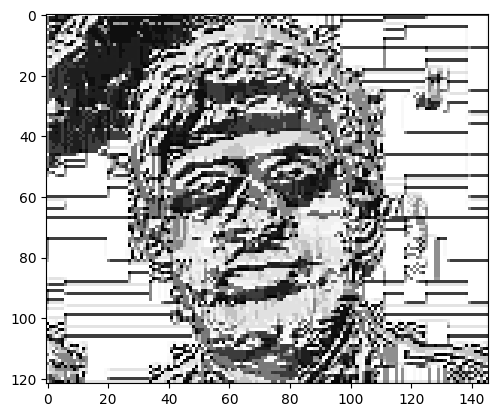

array([[255, 255, 223, ...,  62,  62,  56],
       [126,  30,  31, ..., 255, 255, 248],
       [126,  18,   7, ..., 255, 255, 248],
       ...,
       [126,  63, 159, ...,  15, 191, 248],
       [124,  62,  63, ..., 159, 255,  24],
       [226,  98,  35, ..., 163,   3, 160]], dtype=uint8)

In [6]:
from matplotlib import pyplot as plt
l = lbp(photo1)
plt.imshow(l, cmap="gray")
plt.show()
l
